# Particle Classification using ML

## In this notebook, we explore the MultiJet dataset from CMS using Machine Learning and Predict Jet Count

### Description of the Dataset
1) Run: The run number of the event.
2) Lumi: The lumi section of the event.
3) Event: The event number of the event.
4) MR: First razor kinematic variable, the MR variable is an estimate of an overall mass scale, which in the limit of massless decay products equals the mass of the heavy parent particle.
5) Rsq: Second razor kinematic variable, the Rsq variable is the square of the ratio R, which quantifies the flow of energy in the plane perpendicular to the beam and the partitioning of momentum between visible and invisible particles.
6) E1
7) Px1
8) Py1
9) Pz1: The four-vector of the leading megajet (with the largest transverse momentum).
10) E2
11) Px2
12) Py2
13) Pz2: The four-vector of the subleading megajet (with the largest transverse momentum).
14) HT: The scalar sum of the transverse momentum of the jets.
15) MET: The magnitude of the vector sum of the transverse energy of the particles in the event.
16) nJets: The number of jets with transverse momentum above 40 GeV.
17) nBJets: The number of b-tagged jets with transverse momentum above 40 GeV.


### Acknowledgements
Duarte, Javier; (2015). Example CSV output file for SUSYBSMAnalysis-RazorFilter. CERN Open Data Portal.


In [1]:
# imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset
df = pd.read_csv('/Users/soumyashaw/Desktop/Masters Thesis/Particle Classification using ML/MultiJetRun2010B.csv')

In [3]:
df.head()

,Run,Lumi,Event,MR,Rsq,E1,Px1,Py1,Pz1,E2,Px2,Py2,Pz2,HT,MET,nJets,nBJets
0,148029,388,302318745,215.553,0.031977,136.7100,-109.893,-54.03420,-58.9032,142.1790,70.0254,41.12250,-116.5130,203.666,18.31100,2,0
1,148029,388,302323641,155.437,0.042157,83.3865,81.150,6.88361,-12.9688,73.9025,-72.2472,11.88350,3.0899,154.659,14.77470,2,0
2,148029,388,302336217,400.563,0.026938,253.1840,139.902,102.64000,-101.9350,535.5510,-110.3790,-89.09290,-516.1790,343.280,25.22110,3,0
3,148029,388,302382289,286.245,0.094192,175.4860,-156.024,-62.95350,-47.7434,112.8510,89.0843,3.45025,67.9007,257.397,46.02880,2,0
4,148029,388,302403873,204.514,0.018804,833.7950,100.410,-16.65900,-827.4980,445.6120,-91.1991,15.55830,-390.1440,269.492,8.11345,3,0


### Baseline Results
#### - Linear Regression (66%)
#### - K-Nearest Neighbors (66%)

In [4]:
# Import necessary libraries

features = list(df.columns)

df = df[df['nJets'] <= 4]  # we only need bi, tri and tetrajets

X = df[features].drop(columns=['nJets'])
y = df['nJets']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Linear Regression model
modelLR = LinearRegression()
modelLR.fit(X_train, y_train)

# Create and train the KNN model
modelKNN  = KNeighborsClassifier(n_neighbors=5)
modelKNN.fit(X_train_scaled, y_train)

# Predict on test data (Linear Regression)
y_pred_LR = modelLR.predict(X_test)
y_pred_LR = np.round(y_pred_LR)

# Predict on test data (KNN)
y_pred_KNN = modelKNN.predict(X_test_scaled)

# Evaluation metrics for Linear Regression
print("Linear Regression:")
print(classification_report(y_test, y_pred_LR))

print("K-Nearest Neighbors:")
print(classification_report(y_test, y_pred_KNN))

Linear Regression:
              precision    recall  f1-score   support

         2.0       0.76      0.84      0.80      4233
         3.0       0.43      0.41      0.42      1824
         4.0       0.46      0.04      0.08       403
         5.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         0

    accuracy                           0.67      6460
   macro avg       0.33      0.26      0.26      6460
weighted avg       0.65      0.67      0.65      6460

K-Nearest Neighbors:
              precision    recall  f1-score   support

           2       0.72      0.89      0.80      4233
           3       0.45      0.29      0.35      1824
           4       0.43      0.08      0.14       403

    accuracy                           0.67      6460
   macro avg       0.53      0.42      0.43      6460
weighted avg       0.63      0.67      0.63      6460



/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


        MR       Rsq        E1      Px1        Py1       Pz1        E2  \
0  215.553  0.031977  136.7100 -109.893  -54.03420  -58.9032  142.1790   
1  155.437  0.042157   83.3865   81.150    6.88361  -12.9688   73.9025   
2  400.563  0.026938  253.1840  139.902  102.64000 -101.9350  535.5510   
3  286.245  0.094192  175.4860 -156.024  -62.95350  -47.7434  112.8510   
4  204.514  0.018804  833.7950  100.410  -16.65900 -827.4980  445.6120   

        Px2       Py2       Pz2       HT       MET  nJets  nBJets  
0   70.0254  41.12250 -116.5130  203.666  18.31100      2       0  
1  -72.2472  11.88350    3.0899  154.659  14.77470      2       0  
2 -110.3790 -89.09290 -516.1790  343.280  25.22110      3       0  
3   89.0843   3.45025   67.9007  257.397  46.02880      2       0  
4  -91.1991  15.55830 -390.1440  269.492   8.11345      3       0  


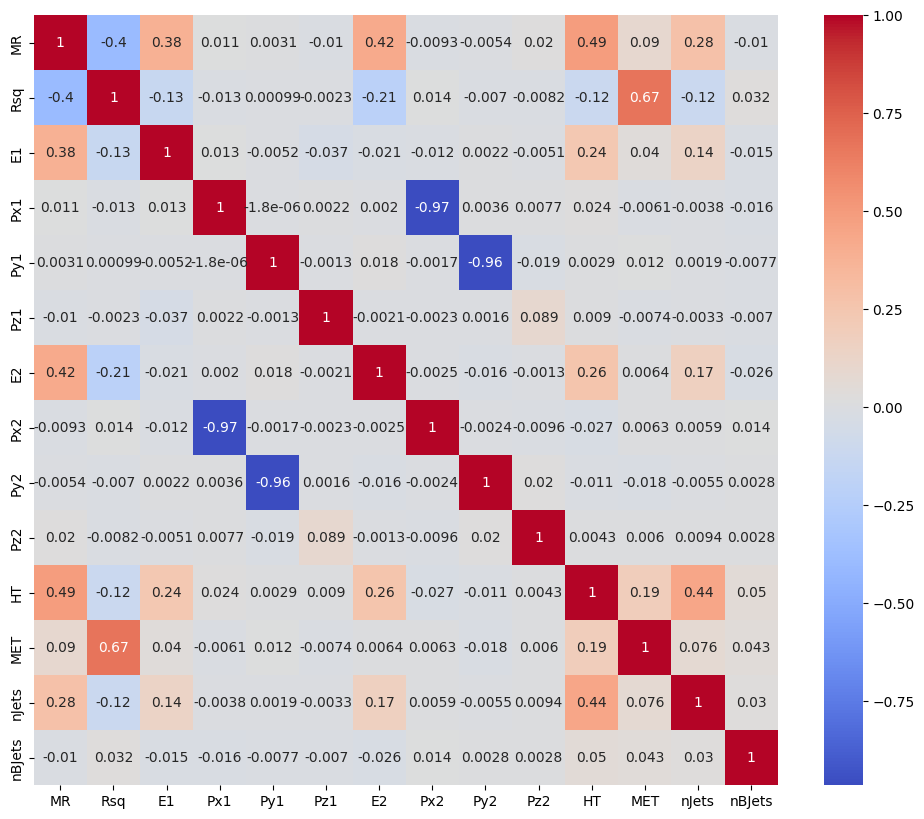

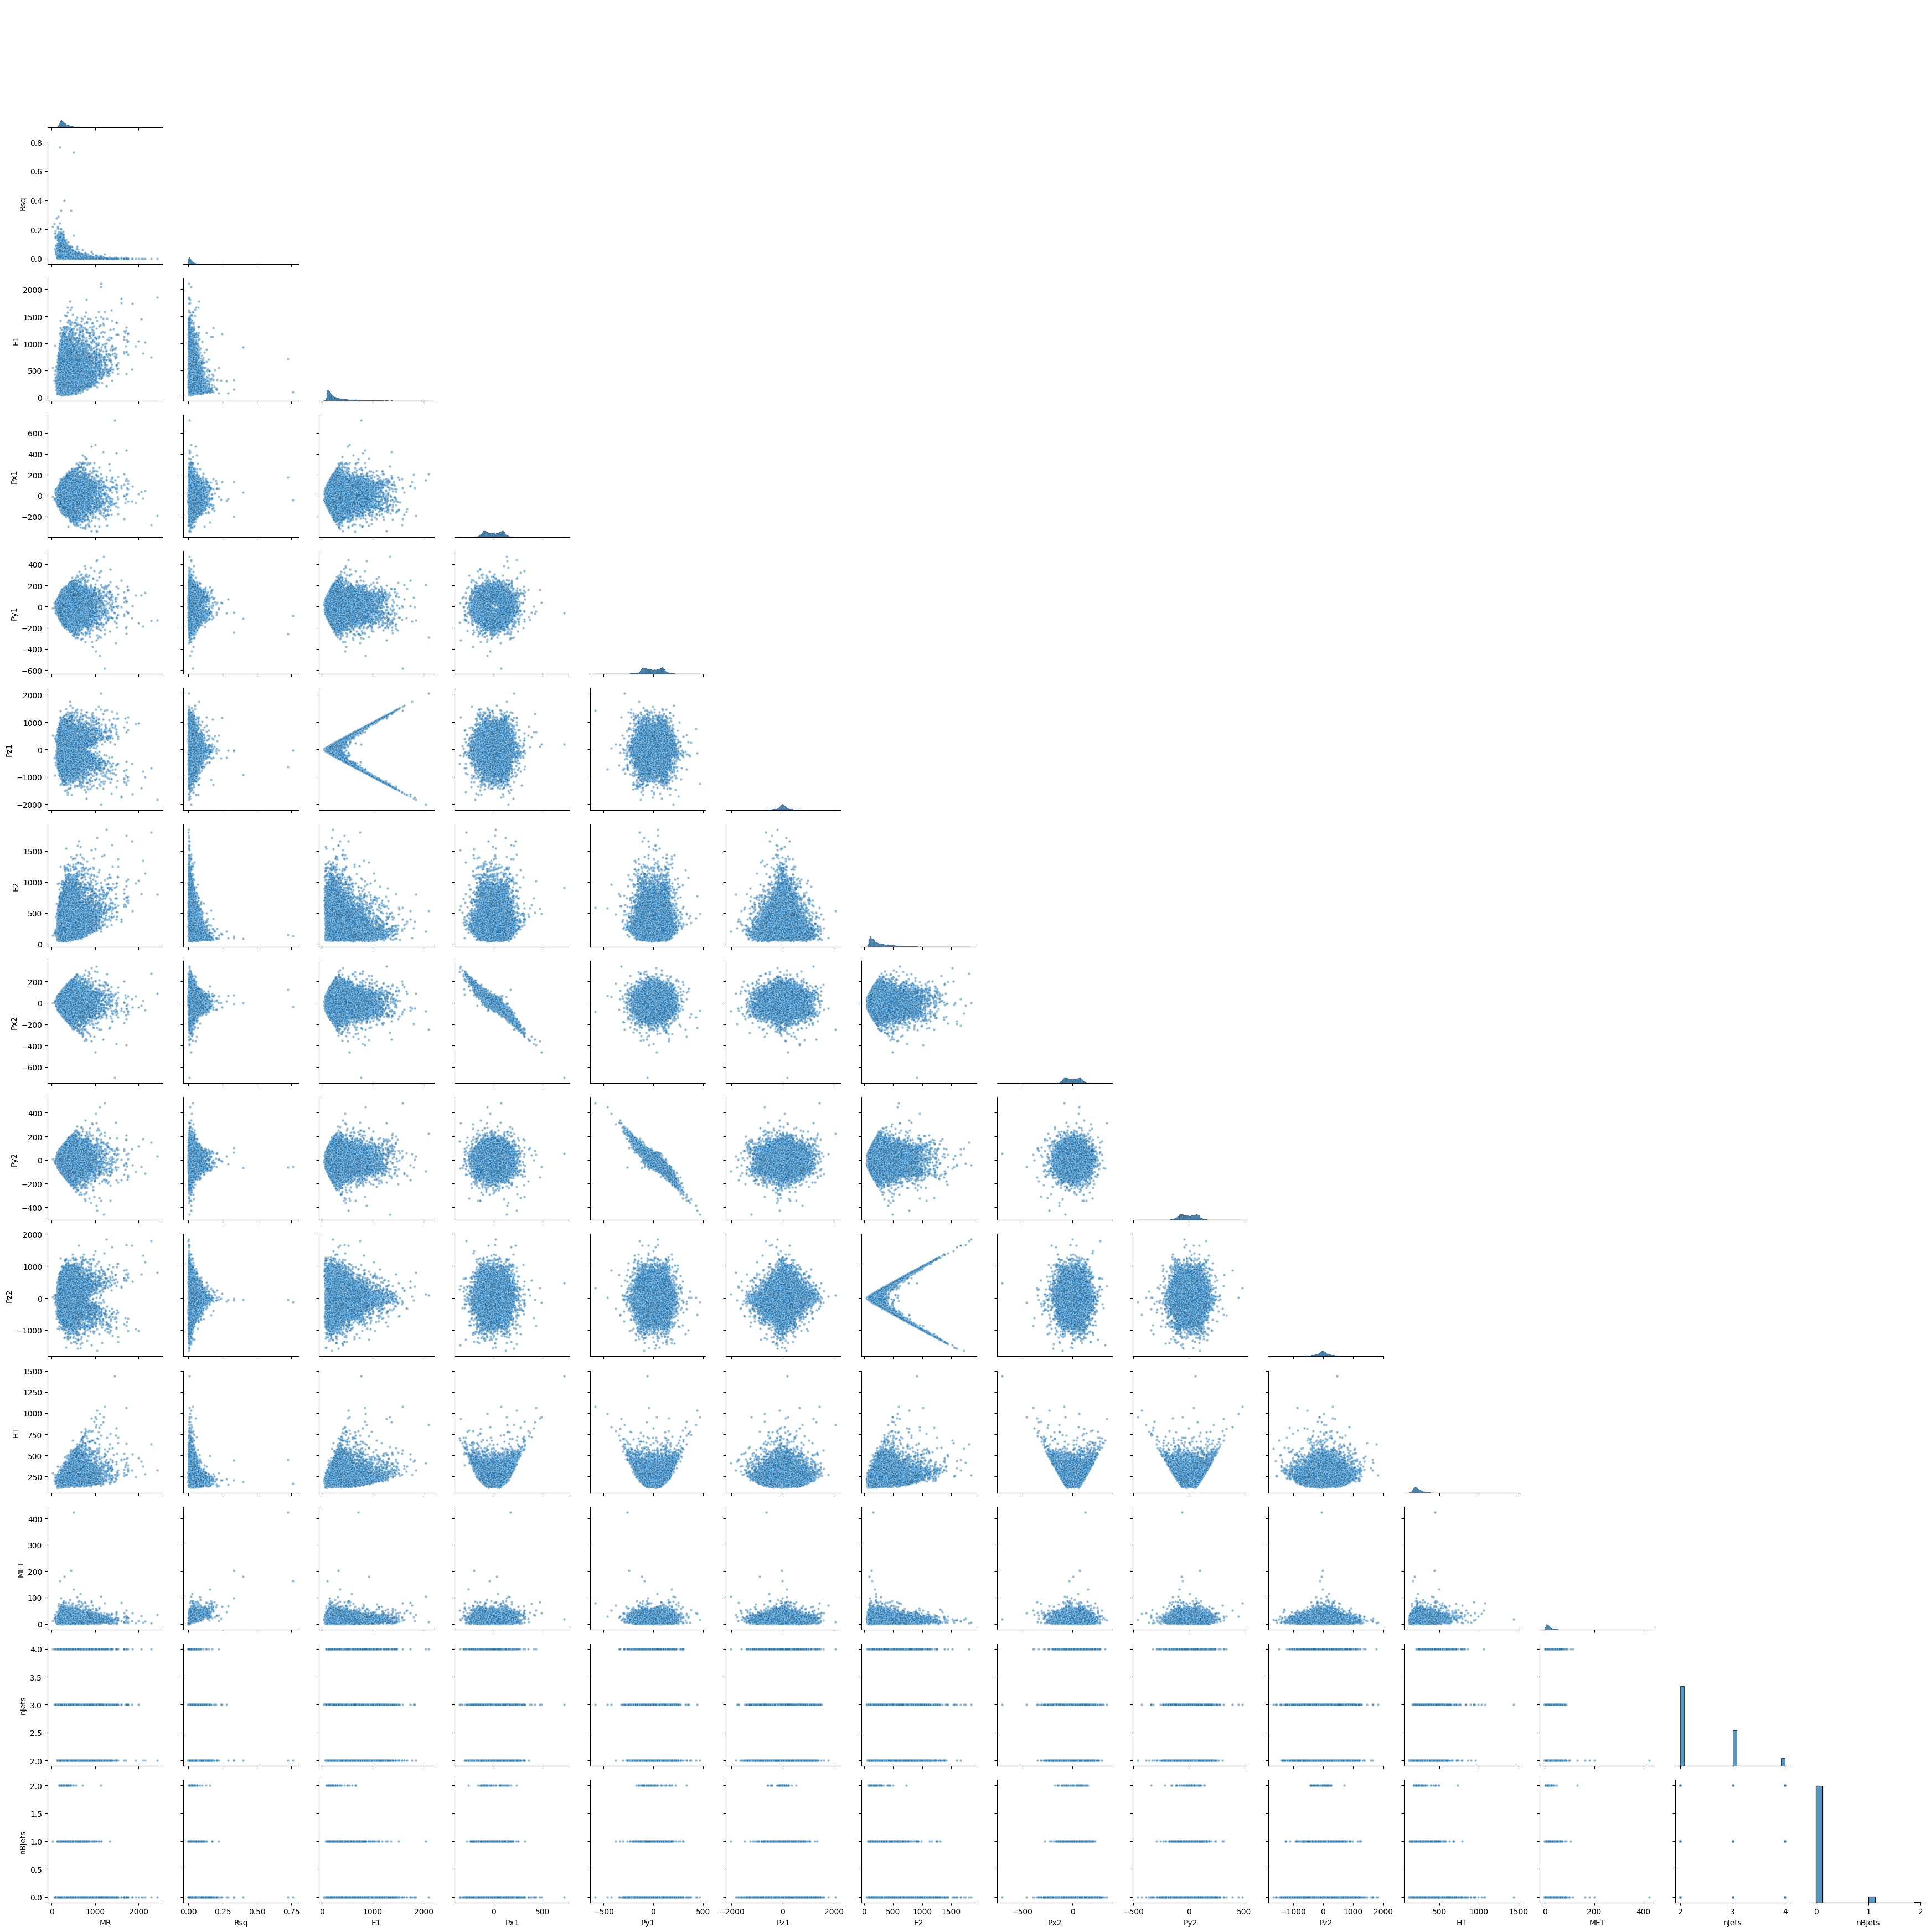

In [5]:
# Data Preprocessing

# Drop unnecessary columns
df2 = df.drop(['Event', 'Run', 'Lumi'], axis=1)
print(df2.head())

# Correlation Matrix
corr = df2.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

sns.pairplot(df2, corner=True, plot_kws={'s': 10, 'alpha': 0.5})
plt.tight_layout()
plt.show()

df2 = df2[df2['nJets'] <= 4]  # we only need bi, tri and tetrajets

# Split the data into features and target
X = df2.drop('nJets', axis=1)
y = df2['nJets']

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# PCA for Dimensionality Reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, svd_solver='full')
X_train_pca = pca.fit_transform(X_train)

X_test_pca = pca.transform(X_test)

# Step 4: Output the number of components and shape
print(f"Number of components selected: {pca.n_components_}")
print(f"Shape of PCA-transformed data: {X_train_pca.shape}")

print(X_train.shape)
print(X_train_pca.shape)
print(y_train.shape)

Number of components selected: 10
Shape of PCA-transformed data: (15071, 10)
(15071, 13)
(15071, 10)
(15071,)


### Predict number of jets (`nJets`) from the other features.

In [7]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.71      0.92      0.81      4233
           3       0.42      0.21      0.28      1824
           4       0.37      0.06      0.10       403

    accuracy                           0.67      6460
   macro avg       0.50      0.40      0.40      6460
weighted avg       0.61      0.67      0.61      6460



In [8]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.73      0.93      0.81      4233
           3       0.53      0.29      0.37      1824
           4       0.53      0.08      0.13       403

    accuracy                           0.69      6460
   macro avg       0.59      0.43      0.44      6460
weighted avg       0.66      0.69      0.65      6460



In [9]:
# SVM
from sklearn.svm import SVC

model = SVC(kernel='rbf', probability=True)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.82      0.99      0.90      4233
           3       0.76      0.53      0.62      1824
           4       0.71      0.10      0.17       403

    accuracy                           0.81      6460
   macro avg       0.76      0.54      0.56      6460
weighted avg       0.79      0.81      0.77      6460



In [10]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.79      0.77      0.78      4233
           3       0.46      0.48      0.47      1824
           4       0.24      0.25      0.25       403

    accuracy                           0.66      6460
   macro avg       0.50      0.50      0.50      6460
weighted avg       0.66      0.66      0.66      6460



In [11]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.79      0.92      0.85      4233
           3       0.58      0.45      0.51      1824
           4       0.45      0.11      0.18       403

    accuracy                           0.74      6460
   macro avg       0.60      0.49      0.51      6460
weighted avg       0.71      0.74      0.71      6460



In [12]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(n_estimators=200)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.82      0.88      0.85      4233
           3       0.57      0.51      0.53      1824
           4       0.46      0.29      0.36       403

    accuracy                           0.74      6460
   macro avg       0.62      0.56      0.58      6460
weighted avg       0.72      0.74      0.73      6460



In [13]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.71      0.87      0.78      4233
           3       0.39      0.17      0.24      1824
           4       0.23      0.25      0.24       403

    accuracy                           0.64      6460
   macro avg       0.44      0.43      0.42      6460
weighted avg       0.59      0.64      0.59      6460



In [14]:
# MLP Classifier
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.89      0.97      0.93      4233
           3       0.78      0.67      0.72      1824
           4       0.54      0.35      0.42       403

    accuracy                           0.85      6460
   macro avg       0.74      0.66      0.69      6460
weighted avg       0.84      0.85      0.84      6460



In [15]:
# Deep Neural Network
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as L

model = keras.Sequential()
model.add(L.Input(shape=10))
model.add(L.Dense(128))
model.add(L.ReLU())
model.add(L.Dense(64))
model.add(L.ReLU())
model.add(L.Dense(8))
model.add(L.Softmax())

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 re_lu (ReLU)                (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 softmax (Softmax)           (None, 8)                 0         
                                                                 
Total params: 10184 (39.78 KB)
Trainable params: 10184 (

In [17]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),loss=keras.losses.SparseCategoricalCrossentropy(),metrics=keras.metrics.SparseCategoricalAccuracy())

In [18]:
model.fit(x=X_train_pca,y=y_train,epochs=100)

Epoch 1/100
471/471 [==============================] - 1s 548us/step - loss: 0.6839 - sparse_categorical_accuracy: 0.6842
Epoch 2/100
471/471 [==============================] - 0s 534us/step - loss: 0.5587 - sparse_categorical_accuracy: 0.7470
Epoch 3/100
471/471 [==============================] - 0s 531us/step - loss: 0.4925 - sparse_categorical_accuracy: 0.7877
Epoch 4/100
471/471 [==============================] - 0s 531us/step - loss: 0.4553 - sparse_categorical_accuracy: 0.8034
Epoch 5/100
471/471 [==============================] - 0s 531us/step - loss: 0.4311 - sparse_categorical_accuracy: 0.8187
Epoch 6/100
471/471 [==============================] - 0s 531us/step - loss: 0.4179 - sparse_categorical_accuracy: 0.8248
Epoch 7/100
471/471 [==============================] - 0s 532us/step - loss: 0.4071 - sparse_categorical_accuracy: 0.8284
Epoch 8/100
471/471 [==============================] - 0s 531us/step - loss: 0.3948 - sparse_categorical_accuracy: 0.8361
Epoch 9/100
471/471 [===

In [19]:
preds = model.predict(X_test_pca)
prediction = np.argmax(preds,axis=1)
print(classification_report(y_test, prediction))

202/202 [==============================] - 0s 389us/step
              precision    recall  f1-score   support

           2       0.94      0.89      0.91      4233
           3       0.66      0.80      0.72      1824
           4       0.46      0.26      0.33       403

    accuracy                           0.83      6460
   macro avg       0.69      0.65      0.66      6460
weighted avg       0.83      0.83      0.82      6460




## Final Evaluation Summary

After evaluating multiple machine learning models on the CMS MultiJet dataset to predict jet counts (`nJets`), the following results were obtained:

- **Baseline: Linear Regression**
  - Accuracy: **67%**

- **Baseline: K-Nearest Neighbors**
  - Accuracy: **67%**

- **Support Vector Machine**
  - Accuracy: **81%**
  - Good precision and recall for class `2` (F1: 0.90)
  - Poor performance for class `4` (F1: 0.17)

- **Random Forest**
  - Accuracy: **74%**
  - Improved performance on class `3` compared to KNN
  - Still underperforming for class `4` (F1: 0.24)

- **MLP Classifier**
  - Accuracy: **86%**
  - Best precision and recall for class `2` (F1: 0.93)
  - Reasonable handling of class `3` (F1: 0.74)
  - Class `4` remains underrepresented (F1: 0.37)

- **Tensorflow Neural Network**
  - Accuracy: **84%**
  - Similar performance to MLP Classifier
  - Class `4` still underrepresented (F1: 0.44)

### Key Takeaways:
- Class `2` dominates predictions and is learned well by all models.
- Models struggle to generalize for higher jet count classes (imbalanced data).
- **MLP Classifier** consistently outperforms others in overall accuracy and weighted F1.